### Pump sensor Data - Breakdown Prediction

**Problem statement :**

The problem statement given is to find the pattern in the data to predict the breakdown of a water supply pump.

**About Data :**

The data is posted in the kaggle with the title 'Pump sensor data for predictive maintenance'. 

The context of the problem as provided in the kaggle is, 

    'I have a friend who working in a small team that taking care of water pump of a small area far from big town, there are 7 system failure in last year. Those failure cause huge problem to many people and also lead to some serious living problem of some family. The team can't see any pattern in the data when the system goes down, so they are not sure where to put more attention. Since I believe in using data to solve problem, I ask him to provide available sensor data and hope that someone here can help'.

**Link for dataset :** https://www.kaggle.com/datasets/nphantawee/pump-sensor-data/data

### Importing Necessary Libraries

In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

In [2]:
warnings.filterwarnings('ignore')

### Reading the CSV file

In [3]:
df = pd.read_csv(r"D:\01 STUDY MATERIALS\SCALER\Core Module\Portfolio project\pump sensor\archive (1)\sensor.csv")
df

Unnamed: 0            timestamp  sensor_00  sensor_01  sensor_02  \
0                0  2018-04-01 00:00:00   2.465394   47.09201  53.211800   
1                1  2018-04-01 00:01:00   2.465394   47.09201  53.211800   
2                2  2018-04-01 00:02:00   2.444734   47.35243  53.211800   
3                3  2018-04-01 00:03:00   2.460474   47.09201  53.168400   
4                4  2018-04-01 00:04:00   2.445718   47.13541  53.211800   
...            ...                  ...        ...        ...        ...   
220315      220315  2018-08-31 23:55:00   2.407350   47.69965  50.520830   
220316      220316  2018-08-31 23:56:00   2.400463   47.69965  50.564240   
220317      220317  2018-08-31 23:57:00   2.396528   47.69965  50.520830   
220318      220318  2018-08-31 23:58:00   2.406366   47.69965  50.520832   
220319      220319  2018-08-31 23:59:00   2.396528   47.69965  50.520832   

        sensor_03   sensor_04  sensor_05  sensor_06  sensor_07  ...  \
0       46.310760  634.375000   76.45975   13.41146   16.13136  ...   
1       46.310760  634.375000   76.45975   13.41146   16.13136  ...   
2       46.397570  638.888900   73.54598   13.32465   16.03733  ...   
3       46.397568  628.125000   76.98898   13.31742   16.24711  ...   
4       46.397568  636.458300   76.58897   13.35359   16.21094  ...   
...           ...         ...        ...        ...        ...  ...   
220315  43.142361  634.722229   64.59095   15.11863   16.65220  ...   
220316  43.142361  630.902771   65.83363   15.15480   16.70284  ...   
220317  43.142361  625.925903   67.29445   15.08970   16.70284  ...   
220318  43.142361  635.648100   65.09175   15.11863   16.56539  ...   
220319  43.142361  639.814800   65.45634   15.11863   16.65220  ...   

        sensor_43  sensor_44  sensor_45  sensor_46  sensor_47  sensor_48  \
0        41.92708  39.641200   65.68287   50.92593  38.194440   157.9861   
1        41.92708  39.641200   65.68287   50.92593  38.194440   157.9861   
2        41.66666  39.351852   65.39352   51.21528  38.194443   155.9606   
3        40.88541  39.062500   64.81481   51.21528  38.194440   155.9606   
4        41.40625  38.773150   65.10416   51.79398  38.773150   158.2755   
...           ...        ...        ...        ...        ...        ...   
220315   38.28125  68.287030   52.37268   48.32176  41.087960   212.3843   
220316   38.28125  66.840280   50.63657   48.03241  40.798610   213.8310   
220317   39.06250  65.393520   48.90046   48.03241  40.798610   217.3032   
220318   40.62500  64.236110   47.74306   48.32176  40.509258   222.5116   
220319   41.40625  62.789350   46.29630   48.90046  40.219910   227.4306   

        sensor_49  sensor_50  sensor_51  machine_status  
0        67.70834   243.0556   201.3889          NORMAL  
1        67.70834   243.0556   201.3889          NORMAL  
2        67.12963   241.3194   203.7037          NORMAL  
3        66.84028   240.4514   203.1250          NORMAL  
4        66.55093   242.1875   201.3889          NORMAL  
...           ...        ...        ...             ...  
220315  153.64580        NaN   231.1921          NORMAL  
220316  156.25000        NaN   231.1921          NORMAL  
220317  155.38190        NaN   232.0602          NORMAL  
220318  153.93520        NaN   234.0856          NORMAL  
220319  150.46300        NaN   234.0856          NORMAL  

[220320 rows x 55 columns]

In [4]:
pd.set_option('display.max_columns', 55)

### Preprocessing & EDA

#### Non-Graphical Analysis

In [5]:
print('Shape :', df.shape)
print(df.info())

Shape : (220320, 55)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220320 entries, 0 to 220319
Data columns (total 55 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      220320 non-null  int64  
 1   timestamp       220320 non-null  object 
 2   sensor_00       210112 non-null  float64
 3   sensor_01       219951 non-null  float64
 4   sensor_02       220301 non-null  float64
 5   sensor_03       220301 non-null  float64
 6   sensor_04       220301 non-null  float64
 7   sensor_05       220301 non-null  float64
 8   sensor_06       215522 non-null  float64
 9   sensor_07       214869 non-null  float64
 10  sensor_08       215213 non-null  float64
 11  sensor_09       215725 non-null  float64
 12  sensor_10       220301 non-null  float64
 13  sensor_11       220301 non-null  float64
 14  sensor_12       220301 non-null  float64
 15  sensor_13       220301 non-null  float64
 16  sensor_14       220299 non-null  fl

**Observation:**
- The unnamed column is not necessary,
- The timestamp colummn is in object data type, it has to be converted into datetime format,
- The sensor_15 column is empty, so it can be removed

In [6]:
# Converting the timestamp column into datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [7]:
# Removing unnecessary columns
df.drop(columns = ['Unnamed: 0', 'sensor_15'], inplace = True)

In [8]:
# Checking for null values in all the columns
df.isna().sum()

timestamp             0
sensor_00         10208
sensor_01           369
sensor_02            19
sensor_03            19
sensor_04            19
sensor_05            19
sensor_06          4798
sensor_07          5451
sensor_08          5107
sensor_09          4595
sensor_10            19
sensor_11            19
sensor_12            19
sensor_13            19
sensor_14            21
sensor_16            31
sensor_17            46
sensor_18            46
sensor_19            16
sensor_20            16
sensor_21            16
sensor_22            41
sensor_23            16
sensor_24            16
sensor_25            36
sensor_26            20
sensor_27            16
sensor_28            16
sensor_29            72
sensor_30           261
sensor_31            16
sensor_32            68
sensor_33            16
sensor_34            16
sensor_35            16
sensor_36            16
sensor_37            16
sensor_38            27
sensor_39            27
sensor_40            27
sensor_41       

**Observation:**
- All the numerical columns has missing values, lets fill them with average reading for particular sensor under particular machine_status

#### Handling Missing Values

In [9]:
# Average values of all sensor readings under different machine status
sensor_mean = df.groupby('machine_status').mean().reset_index()

In [10]:
# Numerical column names
num_cols = ['sensor_00', 'sensor_01', 'sensor_02', 'sensor_03',
       'sensor_04', 'sensor_05', 'sensor_06', 'sensor_07', 'sensor_08',
       'sensor_09', 'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13',
       'sensor_14', 'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19',
       'sensor_20', 'sensor_21', 'sensor_22', 'sensor_23', 'sensor_24',
       'sensor_25', 'sensor_26', 'sensor_27', 'sensor_28', 'sensor_29',
       'sensor_30', 'sensor_31', 'sensor_32', 'sensor_33', 'sensor_34',
       'sensor_35', 'sensor_36', 'sensor_37', 'sensor_38', 'sensor_39',
       'sensor_40', 'sensor_41', 'sensor_42', 'sensor_43', 'sensor_44',
       'sensor_45', 'sensor_46', 'sensor_47', 'sensor_48', 'sensor_49',
       'sensor_50', 'sensor_51']

In [11]:
# Different machine status
machine_status = ['NORMAL', 'RECOVERING', 'BROKEN']

In [12]:
# Filling the missing values with the average reading of sensors under different conditions of the pump

for col in num_cols:               # Iterating through columns
    
    for status in machine_status:  # Iterating through different machine status
        
        # Extracting the average sensor value
        avg_val = sensor_mean.loc[(sensor_mean['machine_status']==status),col].values[0]
        
        # Assigning the average value for missing values
        df.loc[(df[col].isna() & (df['machine_status']==status)),col] = avg_val

In [13]:
df.isna().sum()

timestamp         0
sensor_00         0
sensor_01         0
sensor_02         0
sensor_03         0
sensor_04         0
sensor_05         0
sensor_06         0
sensor_07         0
sensor_08         0
sensor_09         0
sensor_10         0
sensor_11         0
sensor_12         0
sensor_13         0
sensor_14         0
sensor_16         0
sensor_17         0
sensor_18         0
sensor_19         0
sensor_20         0
sensor_21         0
sensor_22         0
sensor_23         0
sensor_24         0
sensor_25         0
sensor_26         0
sensor_27         0
sensor_28         0
sensor_29         0
sensor_30         0
sensor_31         0
sensor_32         0
sensor_33         0
sensor_34         0
sensor_35         0
sensor_36         0
sensor_37         0
sensor_38         0
sensor_39         0
sensor_40         0
sensor_41         0
sensor_42         0
sensor_43         0
sensor_44         0
sensor_45         0
sensor_46         0
sensor_47         0
sensor_48         0
sensor_49         0


### Visual analysis

#### Univariate Analysis

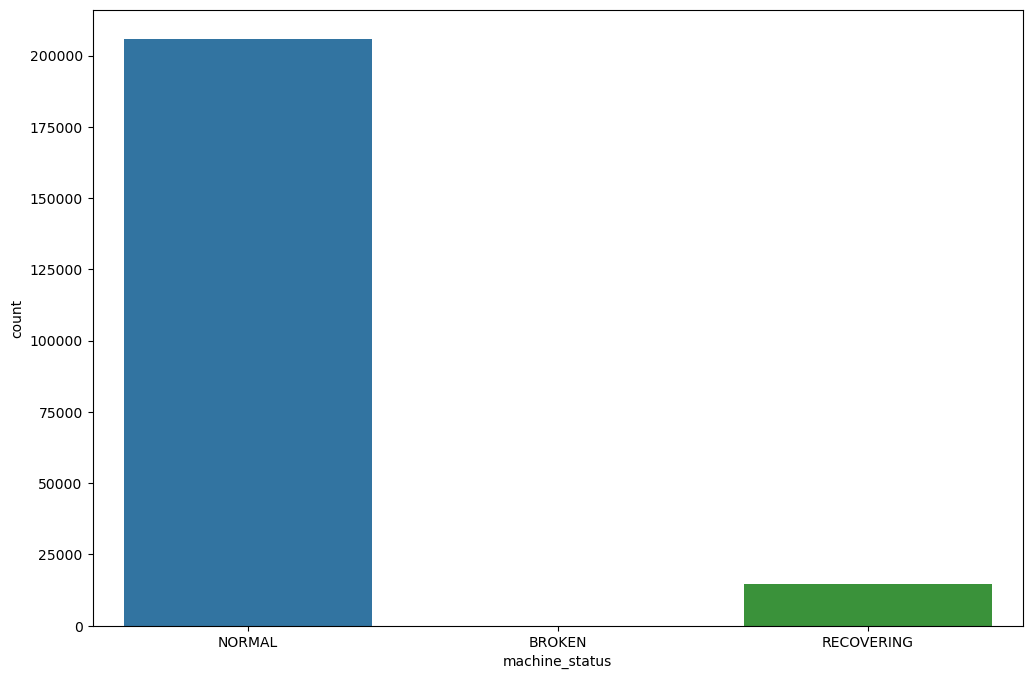

In [14]:
plt.figure(figsize=(12,8))
sns.countplot(df,x='machine_status')
plt.show()

In [15]:
df['machine_status'].value_counts()

machine_status
NORMAL        205836
RECOVERING     14477
BROKEN             7
Name: count, dtype: int64

**Observation:**
- The normal machine status contributes more on the entire data. Since machine_status is the target variable, the data looks extremely imbalanced for building a machine learning model

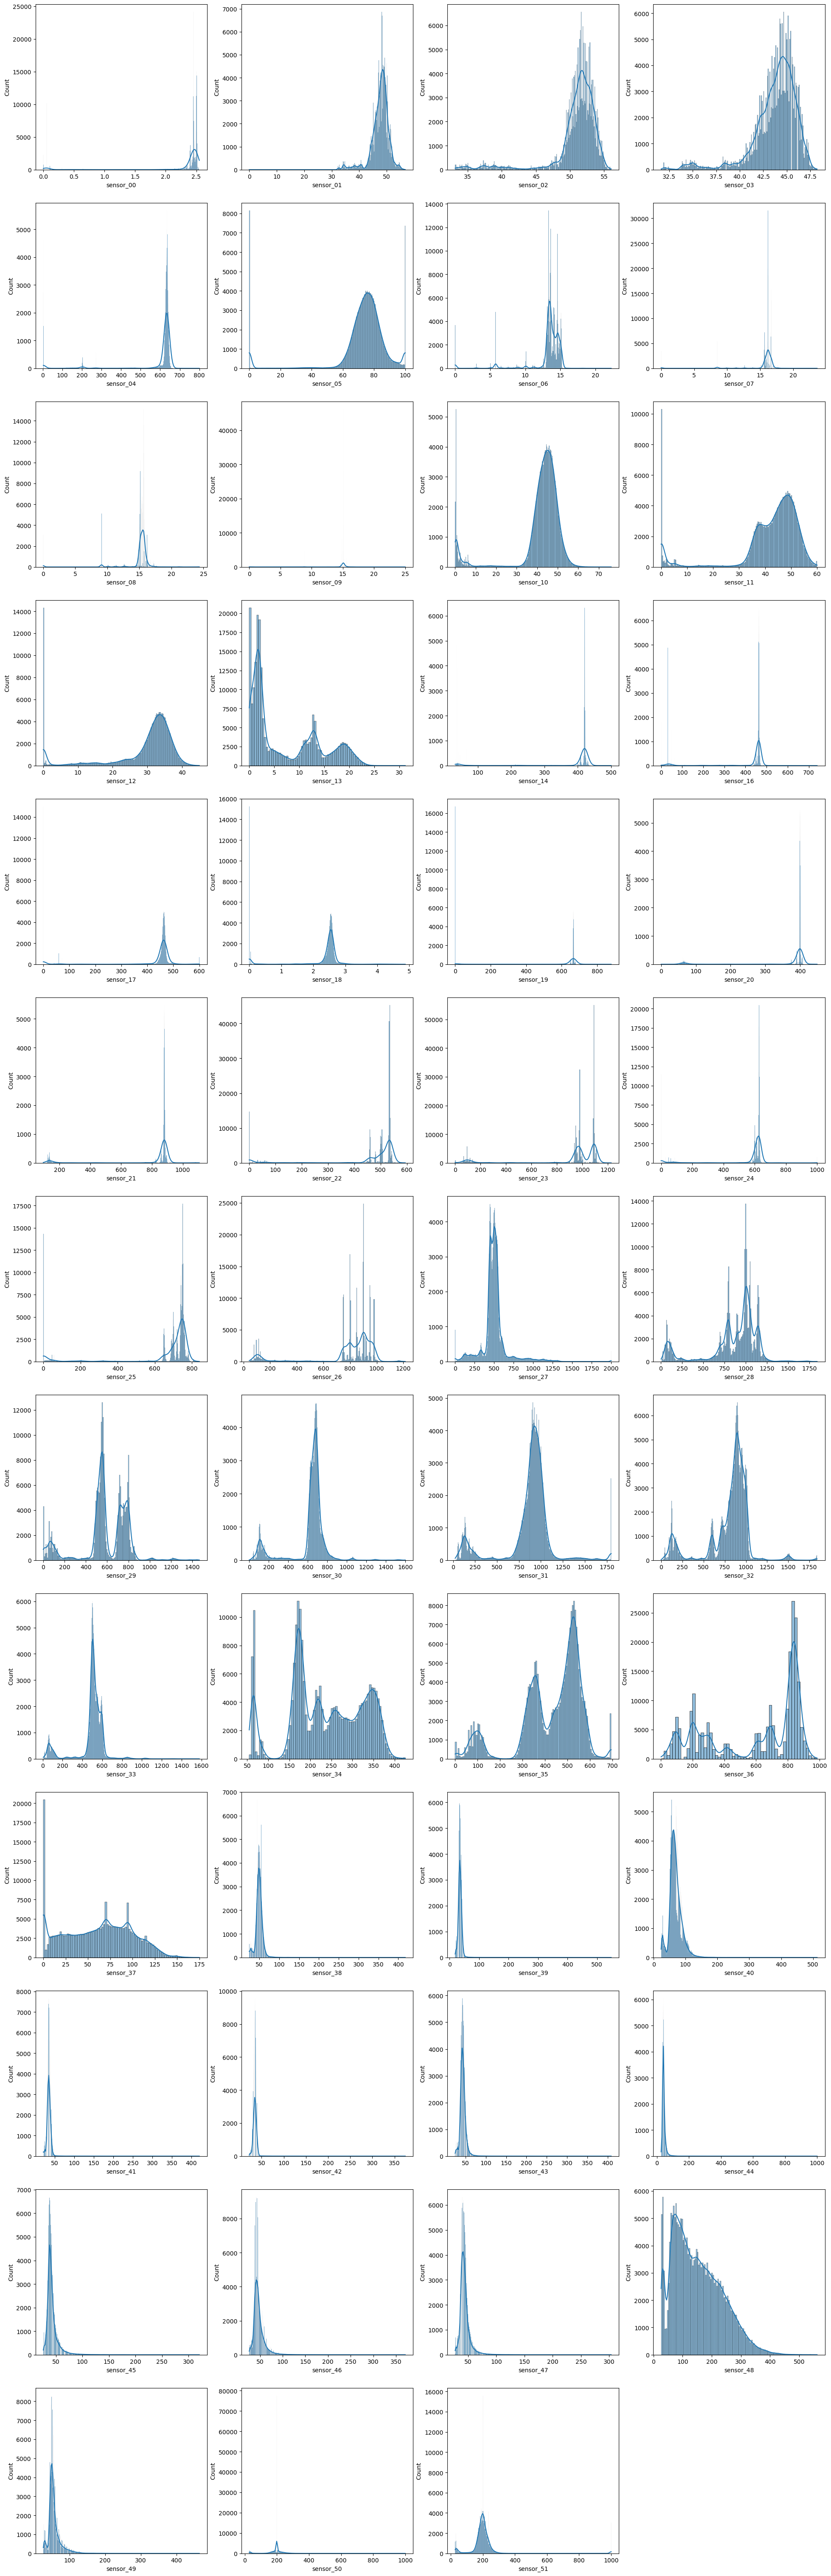

In [16]:
plt.figure(figsize=(24,78))
for i in range(len(num_cols)):
    plt.subplot(13,4,i+1)
    sns.histplot(df[num_cols[i]], kde = True)
plt.show()

**Observation:**
-  All sensor readings have multiple peaks in distribution which might be caused due to the varying values in different machine status and the highest peak must be the sensor reading at normal condition
- Also we can see high variance in some sensor readings like sensor 37 and 45. These might be the sensors which do not have any optimal range during pump operation (for eg: flow sensor reading vary every time depending upon the load) and these types of readings will not have much imapct on the breakdowns

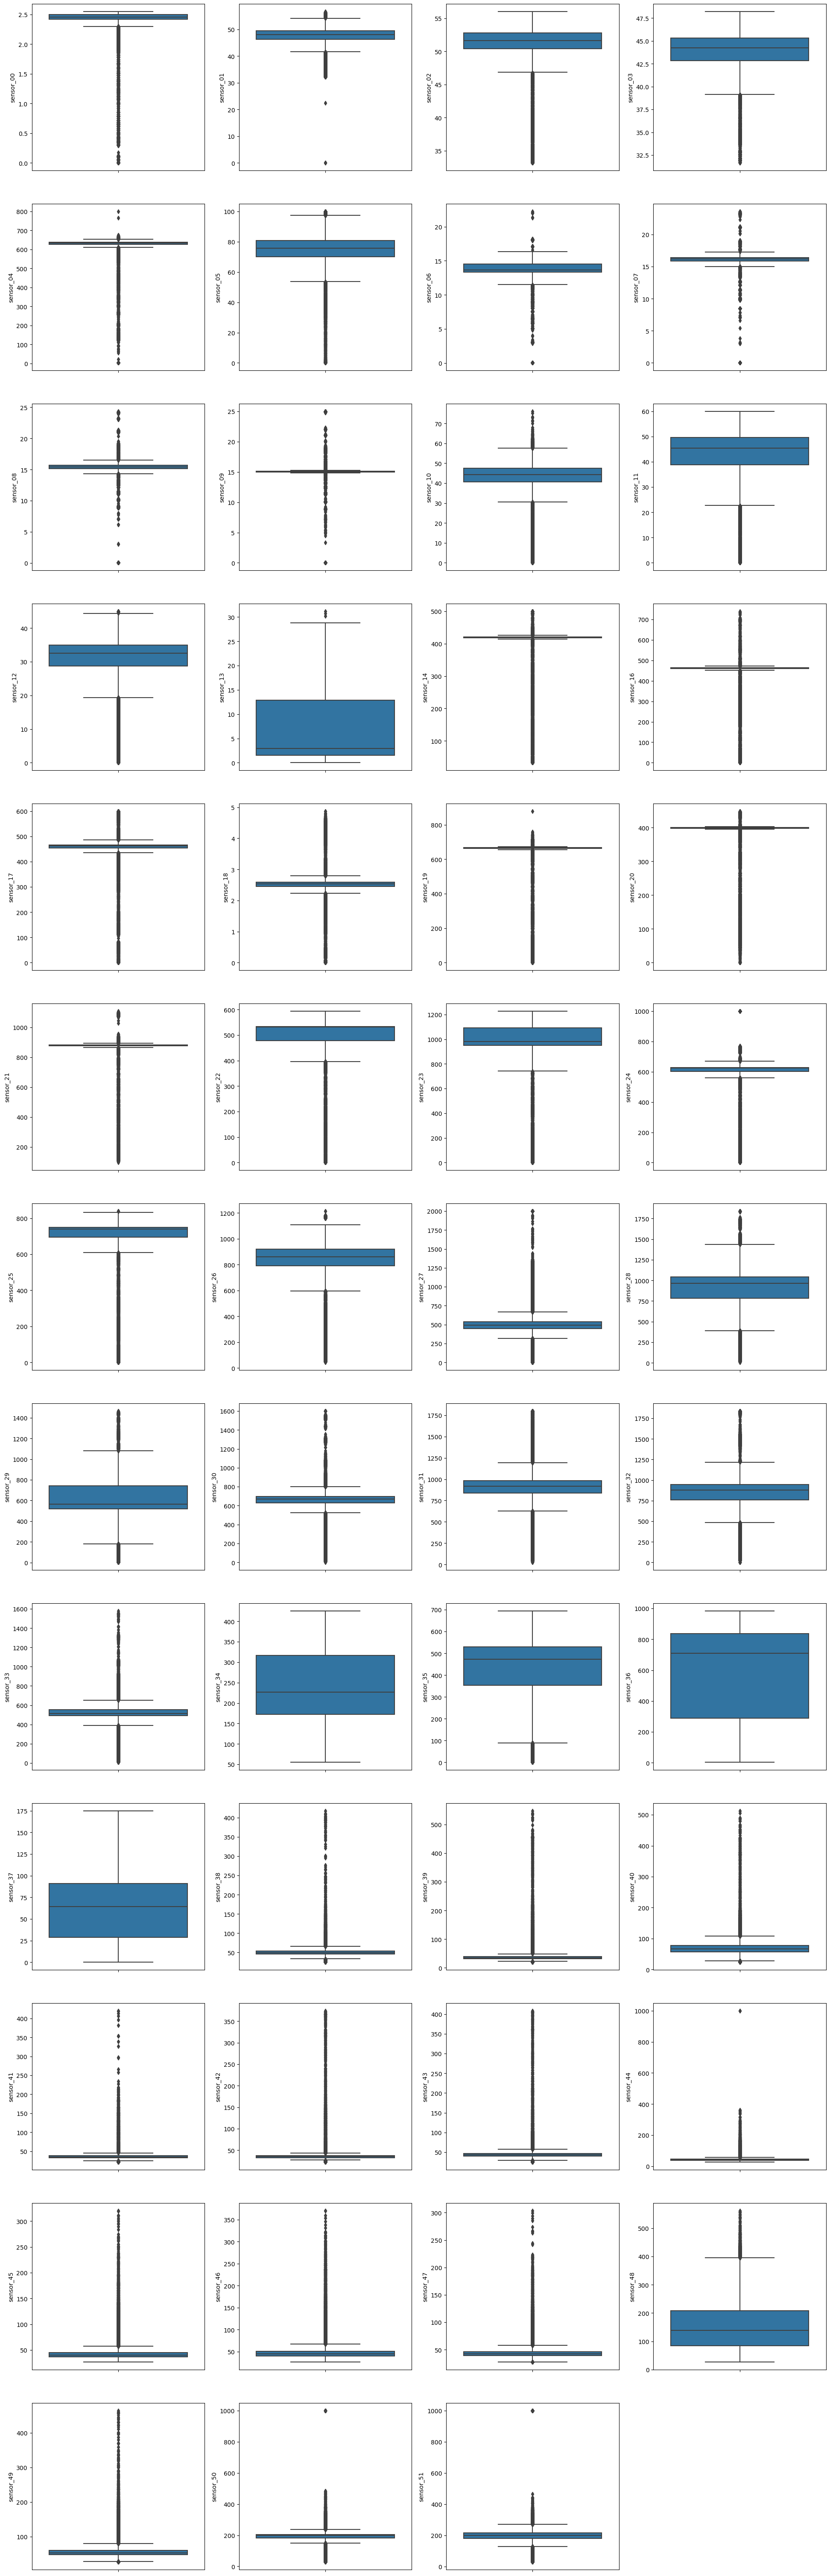

In [17]:
plt.figure(figsize=(24,78))
for i in range(len(num_cols)):
    plt.subplot(13,4,i+1)
    sns.boxplot(df, y = num_cols[i])
plt.show()

**Observation:**
- The body of the box plot is very thin in most of the sensor readings and that range must be the optimal range of those sensors under normal operating conditions
- Again some sensors like 36, 37, and 45 have a thick body which means they record a wider range of values in normal conditions. This confirms the inference got from the histogram

#### Bivariate analysis:

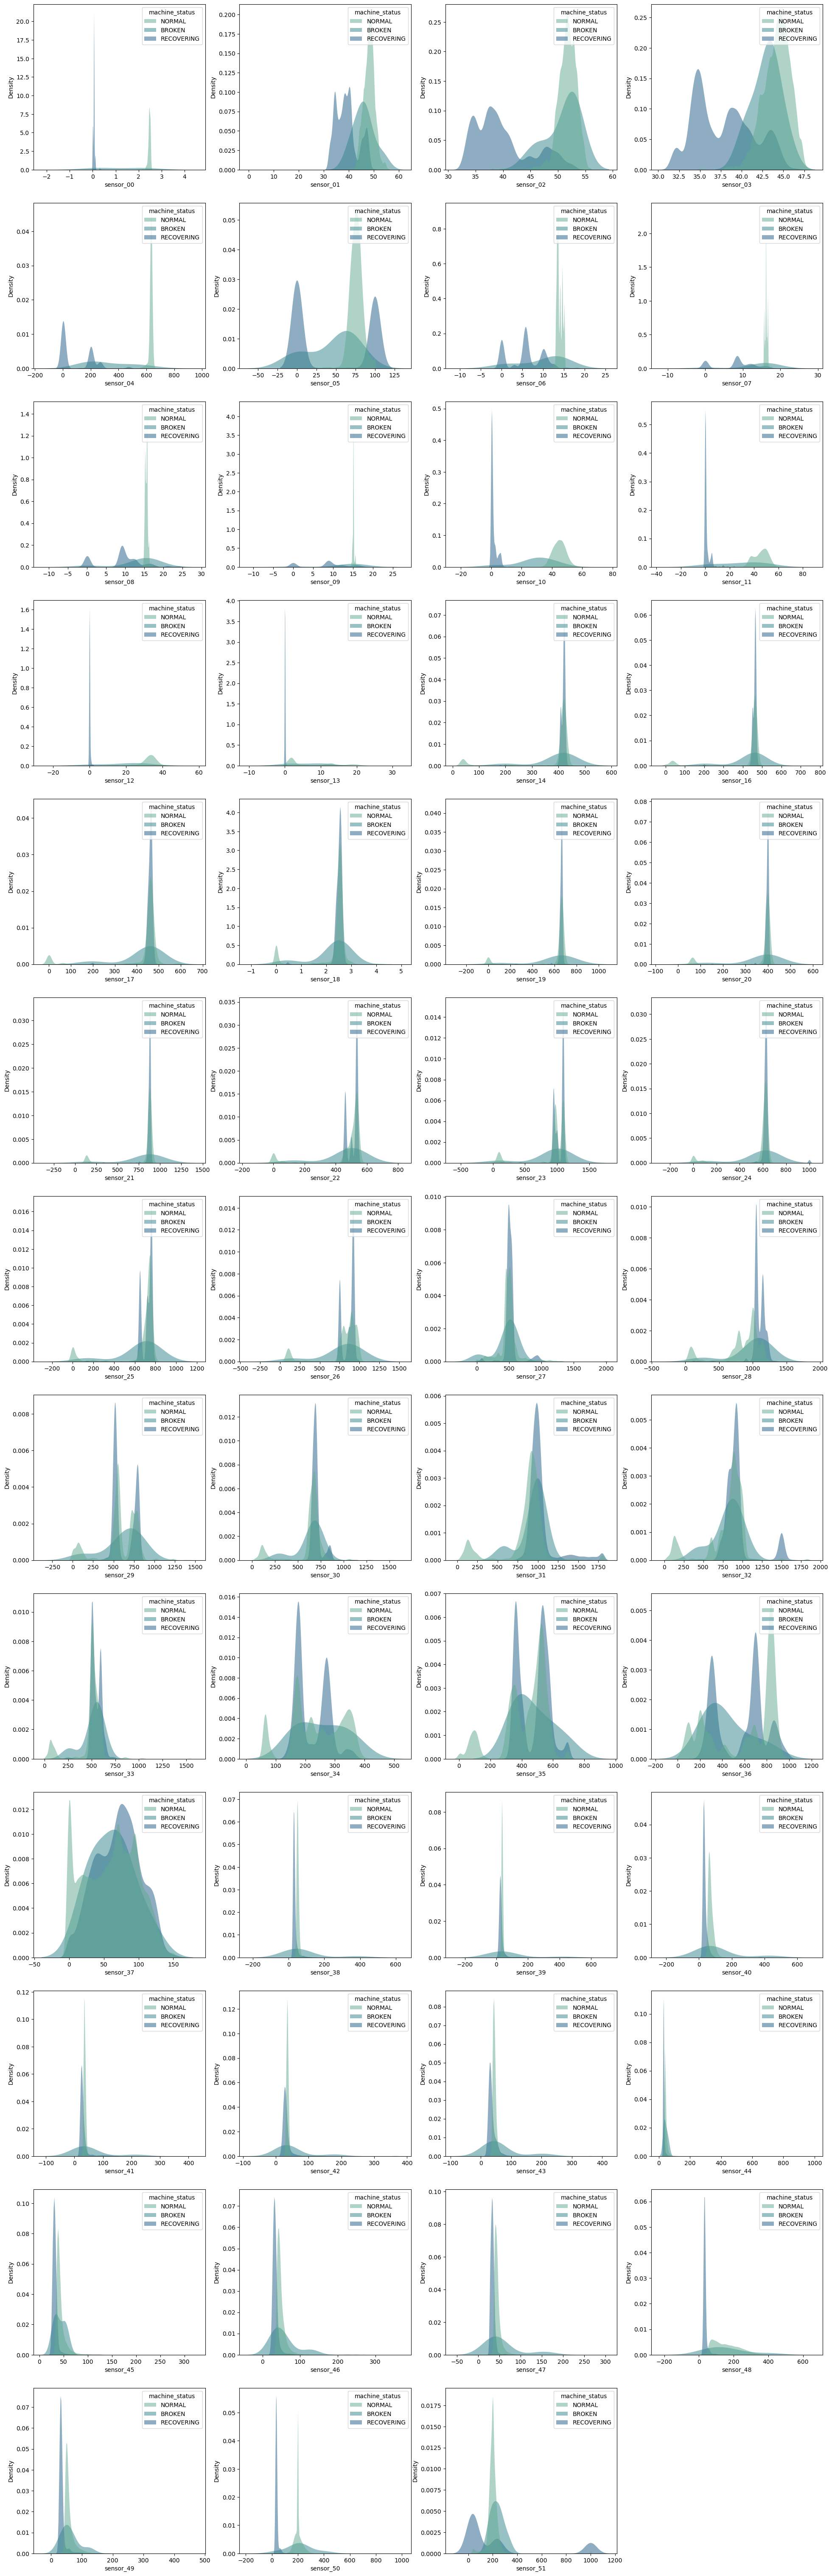

In [18]:
plt.figure(figsize=(24,78))
for i in range(len(num_cols)):
    plt.subplot(13,4,i+1)
    sns.kdeplot(df, x = num_cols[i], hue = 'machine_status', fill=True, 
                common_norm=False, palette="crest", alpha=.5, linewidth=0)
plt.show()

**Observation:**
- We can clearly observe that the multiple peaks in the distribution of the sensor readings is due to the different machine status
- The sensor readings at recovering condition still has multiple peaks in most of the sensors and also it is obvious, because in the recovering phase the readings slowly approaches towards the normal range

In [19]:
plt.figure(figsize=(22,550))
for i in range(len(num_cols)):
    plt.subplot(len(num_cols),1,i+1)
    sns.boxplot(df, y = num_cols[i], x = 'machine_status')
plt.show()

**Observation:**
- The sensors 00, 04, 05, 10, 11, and 12 readings has dropped significantly below their normal readings during breakdown and the sensors 01, 03, 06, and 09 has dropped slightly
- Unlike other sensors, the sensor_28 reading has increased during breakdown
- Rest of all the other sensors reads almost in the same range under all conditions

In [20]:
corel = df[num_cols].corr()

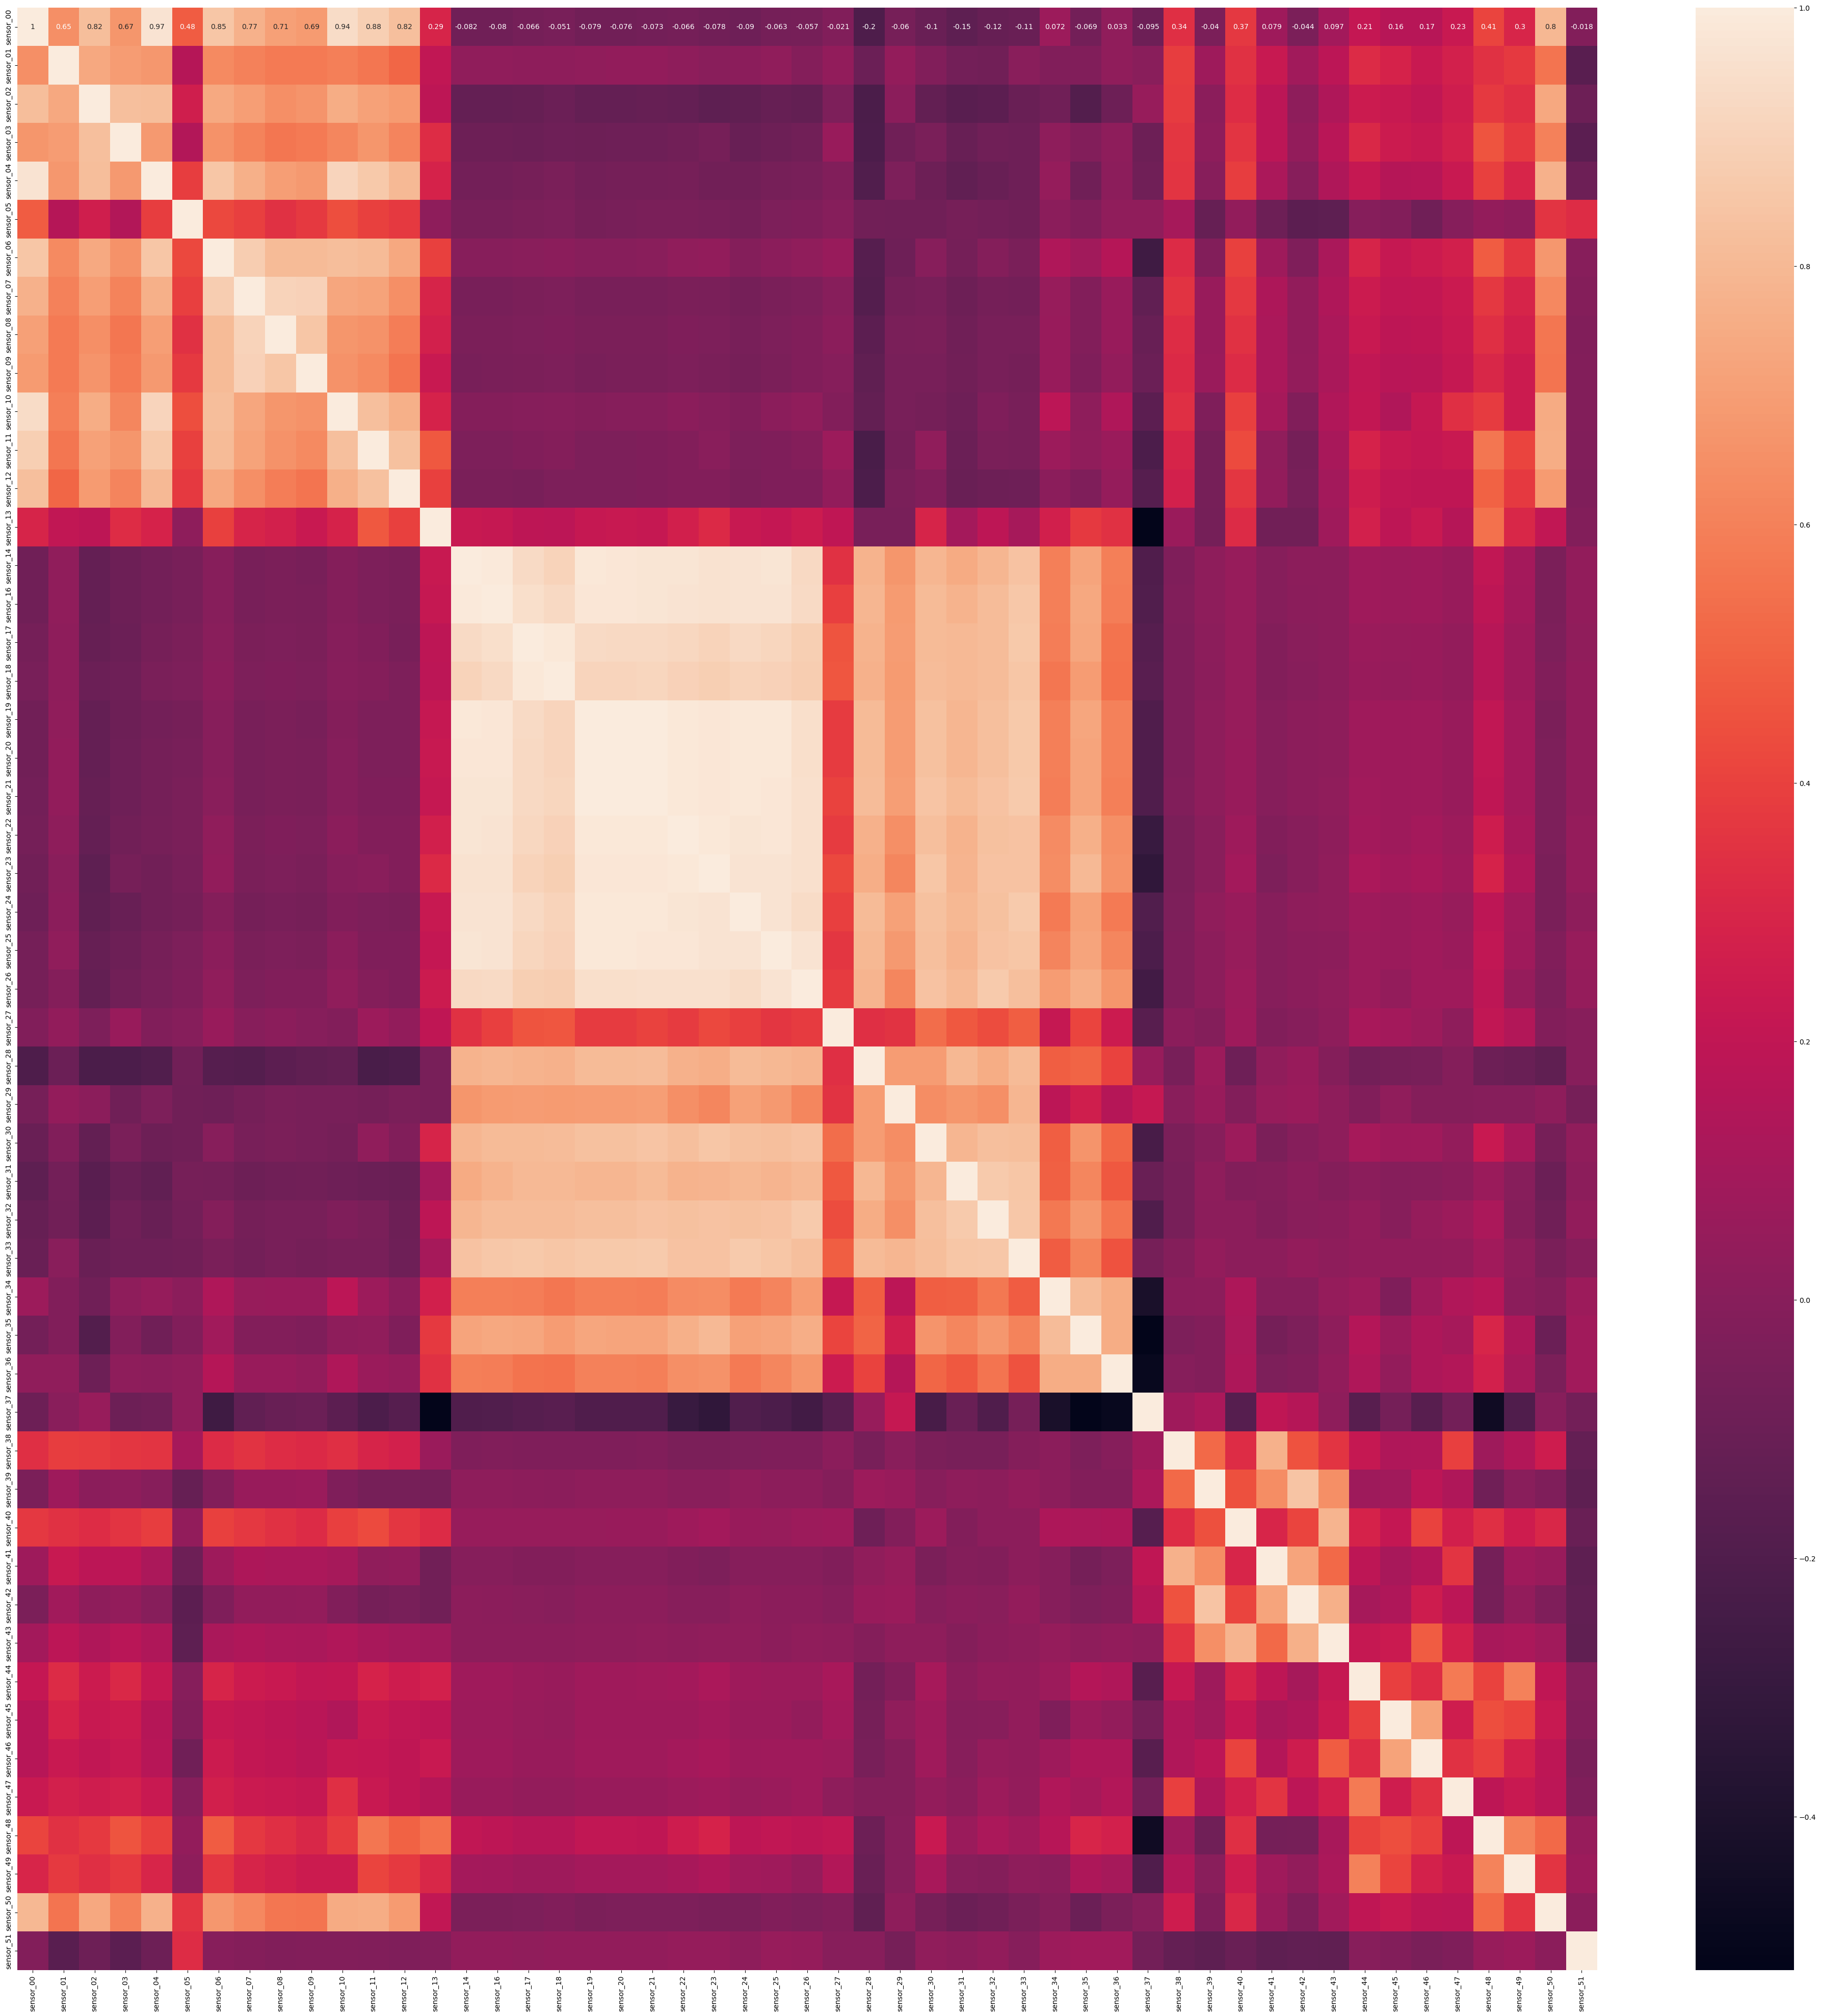

In [21]:
plt.figure(figsize=(50,50))
sns.heatmap(corel, annot=True)
plt.show()

**Observation:**
- The sensor 14 to 26 has high positive co-relation with each other
- The sensor 19, 20 and 21 are fully co-related with each other (co-relation value = 1)

In [22]:
# Checking if sensor 19 and 20 are same or not
(df['sensor_19']==df['sensor_20']).sum()

102

In [23]:
# Checking if sensor_20 and 21 are same or not
(df['sensor_20']==df['sensor_21']).sum()

0

The observation from the heat map is confirmed that the readings from sensor_19 & sensor_20 are 99.95% same, and sensor_20 & 21 are 100% same. So we can drop any two columns

In [24]:
# Dropping the duplicate columns
df.drop(columns = ['sensor_20', 'sensor_21'], inplace = True)

In [25]:
# Dropping column names from the num_cols list
num_cols.remove('sensor_20')
num_cols.remove('sensor_21')

### Target Variable
The problem statement requires to predict the breakdown of the pump. It will be usefull only if we can predict the breakdown atleast before 10 mins. If we use the existing target variable for building the model, it will only predict the breakdown at that instant. So we need a new target variable which can predict the status of the machine after 10 mins. Every datapoint in the given data is recorded in 1 minute interval, so we will offset the machine status column by 10 data points

In [86]:
# Creating new dataframe without last 10 rows of old dataframe
df1 = df.loc[:(len(df)-11),:].reset_index(drop = True)

# Creating new machine status column & Timestamp column with the machine status & timestamp of old dataframe without first 10 rows
df1['machine_status_10m'] = df['machine_status'][10:].reset_index(drop = True)
df1['timestamp_10m'] = df['timestamp'][10:].reset_index(drop = True)

In [90]:
df1[df1['machine_status_10m']=='BROKEN']
# df1

timestamp  sensor_00  sensor_01  sensor_02  sensor_03  \
17145  2018-04-12 21:45:00   2.389641  52.083330  53.038193  43.402775   
24500  2018-04-18 00:20:00   1.880035  42.578130  47.786457  41.449650   
69308  2018-05-19 03:08:00   2.474248  47.178818  52.734370  43.272570   
77780  2018-05-25 00:20:00   2.458507  47.352428  51.475690  42.838539   
128030 2018-06-28 21:50:00   0.363021  40.321180  45.312500  40.234375   
141121 2018-07-08 00:01:00   2.401447  45.355900  53.125000  45.659721   
166430 2018-07-25 13:50:00   2.385706  45.833332  52.994790  44.053820   

         sensor_04  sensor_05  sensor_06  sensor_07  sensor_08  sensor_09  \
17145   393.634247   64.41869   13.41869   16.56539   15.73351   15.08247   
24500   199.999985   76.15113   13.62847   16.65220   16.68837   16.05903   
69308   635.532400   82.29562   13.59230   15.85648   15.07523   14.71354   
77780   630.671300   68.93063   13.70804   16.60880   16.29051   15.01013   
128030  200.523727    0.00000   11.32813   15.12587   15.11863   15.16204   
141121  631.134300   78.82779   14.57610   16.16753   15.84925   15.08247   
166430  579.513855   71.98837   14.32292   16.16753   15.69734   15.16204   

        sensor_10  sensor_11  sensor_12  sensor_13  sensor_14  sensor_16  \
17145   45.545520  52.470210   15.13714   3.407703   405.8738   451.6283   
24500   37.788710  41.036700   33.76601  11.203930   419.0694   460.0103   
69308   46.599870  44.063800   23.60804   9.729940   418.7209   463.1386   
77780   26.544270  41.639660   33.02708   2.184974   419.8844   462.1450   
128030   1.956461   2.013609    0.00000   0.000000   219.9974   220.0864   
141121  38.053860  43.440790   29.63301  18.060460   420.1862   458.4282   
166430  40.199190  46.387710   31.84385  12.120590   419.6061   463.2616   

        sensor_17  sensor_18  sensor_19  sensor_22  sensor_23  sensor_24  \
17145    459.1174   2.506314  650.81480   460.8437   953.0748   616.6500   
24500    456.0704   2.455832  664.08120   459.2036   951.7054   627.5228   
69308    463.8445   2.530362  666.76460   500.5408  1002.1530   627.7448   
77780    465.1572   2.576052  665.89850   533.0853   976.0441   627.3332   
128030   216.7919   0.551356   36.71663   109.0412   129.5848   113.7288   
141121   451.4662   2.406528  665.16520   534.4316  1090.5540   627.5866   
166430   460.2128   2.528811  665.67960   533.1428  1092.0710   627.4620   

        sensor_25  sensor_26   sensor_27  sensor_28  sensor_29  sensor_30  \
17145    649.3439   752.9778  560.106000  1154.9380   794.8843   719.9074   
24500    650.8918   752.9324  510.155900  1054.7340   791.0493   700.0000   
69308    726.6017   871.1954  533.437100  1139.7970   765.9881   646.2963   
77780    737.0731   847.0778  457.646100  1085.9140   705.4310   704.6296   
128030   180.3395   233.9057    2.076904   335.1841   128.4319   391.6667   
141121   764.2474   950.0684  532.739600  1051.4930   566.9676   696.7593   
166430   738.1278   975.0227  479.571700  1004.2150   528.1711   696.2963   

        sensor_31  sensor_32  sensor_33  sensor_34   sensor_35  sensor_36  \
17145   1021.3540   777.5347   561.5191   257.4470  402.155300   303.2484   
24500    956.2499   810.2041   569.2257   172.8949  389.367600   426.5650   
69308   1005.7290   886.0051   614.7629   174.1393  347.481500   284.4327   
77780    911.4583   855.8221   486.7442   174.3208  352.724900   247.7110   
128030   613.0208   469.0647   247.4268   342.8492  694.479126   362.7458   
141121  1058.3330   956.4406   511.0611   287.0169  567.257300   605.8453   
166430  1015.6250  1011.9380   553.0386   345.3266  505.282800   828.8827   

        sensor_37  sensor_38  sensor_39  sensor_40   sensor_41   sensor_42  \
17145   120.05840   48.43750   34.89583   64.32291   35.416664   36.718750   
24500    91.22980   42.70833   35.67708   66.14583   30.208330   31.249998   
69308    92.19454   44.53125   32.81250   59.89583   33.072910   32.812500   
77780    78.68437  354.16670  290.62500  38

### Encoding
  Before starting to build model, the output labels need to be encoded into numbers. Though we have 3 different classes (Normal, Recovering, and Broken) in output, I will encode the output into 2 classes only with Broken as positive class(1) and the rest as negative class(0)

In [91]:
df1['label'] = df1['machine_status_10m'].apply(lambda x: 1 if x=='BROKEN' else 0)

### Modeling

In [92]:
# Separating input and output
x = df1.loc[:,num_cols]
y = df1.loc[:,['label']]

In [93]:
x.shape, y.shape

((220310, 49), (220310, 1))

In [94]:
y.value_counts()

label
0        220303
1             7
Name: count, dtype: int64

#### Oversampling
The data is extremely imbalanced, before creating the model the data has to be balanced by synthetic oversampling (SMOTE)

In [95]:
oversampler = SMOTE()

In [96]:
x_res, y_res = oversampler.fit_resample(x,y)

In [97]:
y_res.value_counts()

label
0        220303
1        220303
Name: count, dtype: int64

#### Splitting data
Let's split the data in 60 : 20 : 20 proportion for training, validation and testing.

In [98]:
x_tr_cv, x_test, y_tr_cv, y_test = train_test_split(x_res, y_res, test_size=0.2, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_tr_cv, y_tr_cv, test_size=0.25,random_state=1)

In [99]:
x_train.shape, x_val.shape, x_test.shape

((264363, 49), (88121, 49), (88122, 49))

In [100]:
y_train.value_counts(), y_val.value_counts(), y_test.value_counts()

(label
 0        132196
 1        132167
 Name: count, dtype: int64,
 label
 0        44066
 1        44055
 Name: count, dtype: int64,
 label
 1        44081
 0        44041
 Name: count, dtype: int64)

#### Standardization
Let's standardize the data before creating a machine learning model so that the data fits in same range across the features

In [101]:
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_val = scaler.transform(x_val)
x_test = scaler.transform(x_test)

In [102]:
x_train[:5]

array([[-6.24321798e-01, -1.43909355e+00, -1.10012326e+00,
        -1.02477906e+00, -2.21145663e+00,  3.12184221e-01,
         7.55027742e-02,  3.86711714e-01,  7.50151495e-01,
         6.87788278e-01, -1.07251047e-01, -6.80590712e-02,
         6.84197743e-01,  5.78834159e-01,  3.37866121e-01,
         3.14585349e-01,  2.47544296e-01,  1.99227451e-01,
         3.52632190e-01, -5.52477842e-02,  7.82745448e-02,
         3.65362201e-01, -4.67897193e-02, -2.11839537e-01,
         1.49696449e-01,  4.32809303e-01,  8.98886432e-01,
         3.79820469e-01,  1.96605202e-01, -7.66411253e-02,
         5.12493117e-01, -8.68565419e-01, -3.78509321e-01,
        -3.50042980e-01,  7.08161143e-01, -4.51800711e-01,
        -3.68446243e-01, -3.79414207e-01, -5.00317592e-01,
        -5.32106620e-01, -5.24633913e-01, -5.07464299e-01,
        -8.38788127e-01, -1.01723921e+00, -7.92985781e-01,
        -1.23031165e+00, -7.46558634e-01, -4.90798117e-01,
        -3.90899981e-01],
       [ 5.14049218e-01,  6.40

In [103]:
y_train[:5]

label
432910      1
187648      0
134154      0
436253      1
108318      0

The y values are in the format of dataframe. It should be converted into 1d array to be used in the model

In [104]:
y_train = y_train.values.flatten()
y_test = y_test.values.flatten()
y_val = y_val.values.flatten()

In [105]:
y_train[:5], y_test[:5], y_val[:5]

(array([1, 0, 0, 1, 0], dtype=int64),
 array([0, 0, 1, 0, 0], dtype=int64),
 array([1, 0, 0, 1, 1], dtype=int64))

#### Logistic Regression

In [106]:
model = LogisticRegression()

In [107]:
model.fit(x_train,y_train)

LogisticRegression()

The model could not complete the training within the given number of iterations. Let's increase the number of iterations and retrain the model.

In [43]:
model = LogisticRegression(max_iter = 500)

In [44]:
model.fit(x_train,y_train)

LogisticRegression(max_iter=500)

Now we have successfully trained the model, lets check the performance of the model. In this case, the recall would be the best metric to evaluate the performance. Because, the type-1 error (False-Positive) of predicting the normal condition as broken will just cause a loss of time for being precautious of breakdown, which is a small loss than the loss caused by the type-2 error (False-Negative) of predicting a breakdown as normal will cause a huge problem of water supply outage for the consumers.
Along with recall, we will also check f1_score and accuracy

#### Model Evaluation

In [108]:
y_val_pred = model.predict(x_val)

In [109]:
cm = confusion_matrix(y_val, y_val_pred)

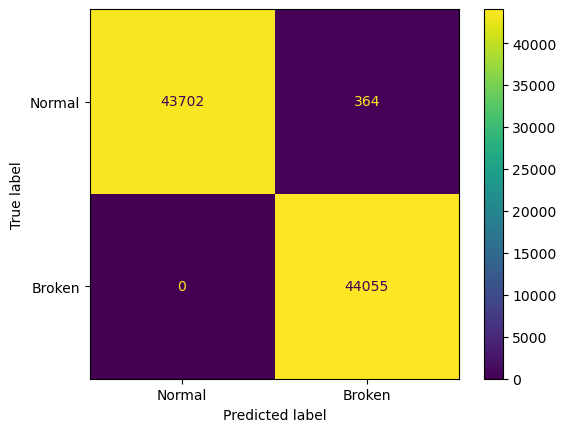

In [110]:
ConfusionMatrixDisplay(cm, display_labels = ['Normal', 'Broken']).plot()

In [111]:
accuracy = model.score(x_val, y_val)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)
print('The accuracy of the model is', accuracy)
print('The recall score of the model is', recall)
print('The f1 score of the model is', f1)

The accuracy of the model is 0.995869316054062
The recall score of the model is 1.0
The f1 score of the model is 0.9958857969572982


In [112]:
from sklearn.metrics import roc_auc_score

In [113]:
roc_auc_score(y_val, y_val_pred)

0.9958698316162121

**Validation report**
- The accuracy of the model is 0.9988765957446809
- The recall score of the model is 1.0
- The f1 score of the model is 0.998876340729811
- The roc_auc_score of the model is 0.9958698316162121

#### Testing

In [114]:
y_test_pred = model.predict(x_test)

In [117]:
cm = confusion_matrix(y_test, y_test_pred)

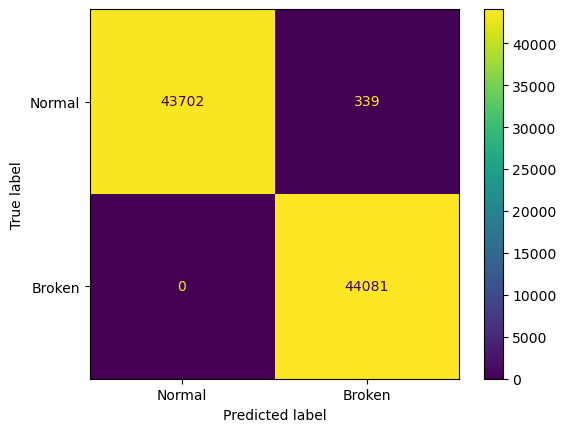

In [118]:
ConfusionMatrixDisplay(cm, display_labels = ['Normal', 'Broken']).plot()

In [119]:
accuracy = model.score(x_test, y_test)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
print('The accuracy of the model is', accuracy)
print('The recall score of the model is', recall)
print('The f1 score of the model is', f1)

The accuracy of the model is 0.9961530605297202
The recall score of the model is 1.0
The f1 score of the model is 0.9961695348075164


In [121]:
roc_auc_score(y_test, y_test_pred)

0.9961513135487386

**Testing report**

- The accuracy of the model is 0.9961530605297202
- The recall score of the model is 1
- 
The f1 score of the model is 0.9961695348075164
- The roc_auc_score of the model i0.996151313548738621